In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
x=[-110.000000,-90.000000,-70.000000,-50.000000,-30.000000,-10.000000,10.000000,30.000000,50.000000,70.000000,90.000000,110.000000]
y=[-110.000000,-90.000000,-70.000000,-50.000000,-30.000000,-10.000000,10.000000,30.000000,50.000000,70.000000,90.000000,110.000000]
z=[-110.000000,-90.000000,-70.000000,-50.000000,-30.000000,-10.000000,10.000000,30.000000,50.000000,70.000000,90.000000,110.000000]
len(list(itertools.product(x, y, z)))


1728

In [3]:
file = "../Physicell/output/new_results/diffusion_1k_new_01/microenv_many_diffusion.csv"
pc_df= pd.read_csv(file,index_col=None,usecols=['timestep','diff'])
pc_df

,diff,timestep
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
174523,6022.0,10.0
174524,6022.0,10.0
174525,6022.0,10.0
174526,6022.0,10.0


In [4]:
pc_df = pc_df[pc_df['diff'] != 6022.0]

pc_df


,diff,timestep
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
174366,3848.571209,10.0
174367,3873.587417,10.0
174368,3936.283977,10.0
174369,4069.680919,10.0


In [5]:
groupe_conc = pc_df.groupby(by="timestep")
result_conc = groupe_conc.mean()
# result_conc['nt'] = groupe_conc.sum()*8000
# pc_df['nt'] = result_conc['diff']
result_conc['diff'] = result_conc['diff']/602.2

result_conc
# timesteps = np.concatenate((np.linspace(0, 1, num=11)[:-1], np.arange(1, 11, 1)))
# timesteps_rounded = np.round(timesteps, 2)
# result_conc['timestep_rounded'] = result_conc.index.map(lambda x: round(x, 2))
# selected_rows = result_conc[result_conc['timestep_rounded'].isin(timesteps_rounded)]
# selected_rows.drop('timestep_rounded', axis=1, inplace=True)


,diff
timestep,
0.0,0.000000
0.1,1.323780
0.2,2.199980
0.3,2.806960
0.4,3.241013
...,...
9.6,4.568951
9.7,4.568951
9.8,4.568951


In [6]:
file = "../Physicell/output/new_results/diffusion_1k_new/microenv_many_diffusion.csv"
pc_df2= pd.read_csv(file,index_col=None,usecols=['timestep','diff'])
pc_df2
pc_df2 = pc_df2[pc_df2['diff'] != 6022.0]
groupe_conc2 = pc_df2.groupby(by="timestep")
result_conc2 = groupe_conc2.mean()
# result_conc['nt'] = groupe_conc.sum()*8000
# pc_df['nt'] = result_conc['diff']
result_conc2['diff'] = result_conc2['diff']/602.2

result_conc2


,diff
timestep,
0.0,0.000000
0.1,1.988078
0.2,3.088289
0.3,3.774832
0.4,4.233221
...,...
9.6,5.438616
9.7,5.438616
9.8,5.438616


In [7]:
file = "../Biodynamo/unit_test_diffusion_1k/data.csv"
bd_df= pd.read_csv(file,index_col=None,header=None,sep = " ",names = ['timestep','avg_diff'])
bd_df

,timestep,avg_diff
0,0.00,0.00000
1,0.01,4.21296
2,0.02,4.33009
3,0.03,4.43521
4,0.04,4.52957
...,...,...
995,9.95,5.55467
996,9.96,5.55467
997,9.97,5.55467
998,9.98,5.55467


In [8]:
file = "../Tisim/diffusion 1k cells.csv"
ts_df= pd.read_csv(file,names = ['timestep','diff'],header=0)
ts_df

,timestep,diff
0,0.01,0.516911
1,0.02,0.744573
2,0.03,0.958188
3,0.04,1.158930
4,0.05,1.347670
...,...,...
1196,11.97,8.970660
1197,11.98,8.970730
1198,11.99,8.970860
1199,12.00,8.970800


In [9]:
file = "../Chaste/unit_test_diffusion_1k/results/TestDiffusionSmall12.dat"
ch_df= pd.read_csv(file,sep='\s+',names = ['timestep','diff','diff_cells'],header=0)
ch_df

,timestep,diff,diff_cells
0,0.00,4.212963,-1.644775e-16
1,0.01,4.420020,2.070569e-01
2,0.02,4.605109,3.921457e-01
3,0.03,4.772509,5.595459e-01
4,0.04,4.925413,7.124504e-01
...,...,...,...
996,9.96,9.998649,5.785686e+00
997,9.97,9.998649,5.785686e+00
998,9.98,9.998649,5.785686e+00
999,9.99,9.998649,5.785686e+00


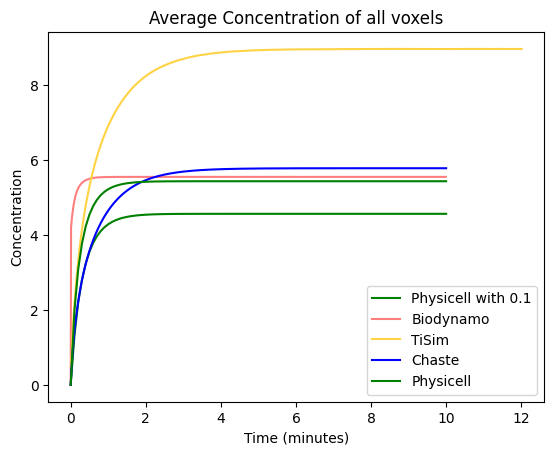

In [10]:
plt.plot(result_conc.index,result_conc['diff'],label = 'Physicell with 0.1',color='green')
plt.plot(bd_df['timestep'],bd_df['avg_diff'],label = 'Biodynamo',alpha=0.5,color = 'red')
plt.plot(ts_df['timestep'],ts_df['diff'],label = 'TiSim', color  = '#ffd343')
plt.plot(ch_df['timestep'],ch_df['diff_cells'],label = 'Chaste', color  = 'blue')
plt.plot(result_conc2.index,result_conc2['diff'],label = 'Physicell with ',color='green')

plt.ylabel("Concentration")
plt.xlabel("Time (minutes)")
plt.legend()
plt.title("Average Concentration of all voxels")
plt.savefig("./updated_average_concentration_of_02_of_all_voxels_1k.png",dpi=200)
plt.show()